In [ ]:
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt

In [ ]:
# Load the API key from .env file
# load_dotenv('API Keys/.env')
# api_key = os.getenv('Census_API_Key')
api_key = str("78894d7610ee4d3fe4c768780f6378fa90c21916")

In [ ]:
# Define the records desired
S1501 = (f"S1501_C01_001E,S1501_C01_002E,S1501_C01_003E,"
         "S1501_C01_004E,S1501_C01_005E,S1501_C01_006E,"
         "S1501_C01_007E,S1501_C01_008E,S1501_C01_009E,"
         "S1501_C01_010E,S1501_C01_011E,S1501_C01_012E,"
         "S1501_C01_013E,S1501_C01_014E,S1501_C01_015E," 
         "S1501_C01_059E,S1501_C01_060E,S1501_C01_061E," 
         "S1501_C01_062E,S1501_C01_063E,S1501_C01_064E")

# Build the URL for the API request
url_S1501 = f"https://api.census.gov/data/2020/acs/acs5/subject?get=NAME,{S1501}&for=tract:*&in=state:39&key={api_key}"

# print(url_S1501)


In [ ]:
# Send the API request and get the response
response_S1501 = requests.get(url_S1501)
data_S1501 = response_S1501.json()

# Convert the response to a DataFrame
columns_S1501 = data_S1501[0]
rows_S1501 = data_S1501[1:]
df_S1501 = pd.DataFrame(rows_S1501, columns=columns_S1501)
df_S1501 = df_S1501.astype({'S1501_C01_001E': float,
                            'S1501_C01_002E': float,
                            'S1501_C01_003E': float,
                            'S1501_C01_004E': float,
                            'S1501_C01_005E': float,
                            'S1501_C01_006E': float,
                            'S1501_C01_007E': float,
                            'S1501_C01_008E': float,
                            'S1501_C01_009E': float,
                            'S1501_C01_010E': float,
                            'S1501_C01_011E': float,
                            'S1501_C01_012E': float,
                            'S1501_C01_013E': float,
                            'S1501_C01_014E': float,
                            'S1501_C01_015E': float,
                            'S1501_C01_059E': float,
                            'S1501_C01_060E': float,
                            'S1501_C01_061E': float,
                            'S1501_C01_062E': float,
                            'S1501_C01_063E': float,
                            'S1501_C01_064E': float
                            }
                            )

# # clean up the data 
def replace_negatives(x):
    if isinstance(x, float) and x > 0:
        return x
    return 0

# # Apply the function to the columns with errors
df_S1501['S1501_C01_059E'] = df_S1501['S1501_C01_059E'].apply(replace_negatives)
df_S1501['S1501_C01_060E'] = df_S1501['S1501_C01_060E'].apply(replace_negatives)
df_S1501['S1501_C01_061E'] = df_S1501['S1501_C01_061E'].apply(replace_negatives)
df_S1501['S1501_C01_062E'] = df_S1501['S1501_C01_062E'].apply(replace_negatives)
df_S1501['S1501_C01_063E'] = df_S1501['S1501_C01_063E'].apply(replace_negatives)
df_S1501['S1501_C01_064E'] = df_S1501['S1501_C01_064E'].apply(replace_negatives)

# Save to a CSV file
df_S1501.to_csv('Resources/ohio_census_tract_educational attainment_ACS_S1501_2020.csv', index=False)


In [ ]:
# Define the records desired
B01003 = (f"B01003_001E,B11005_001E,B11005_002E,B11005_012E,B11005_017E,"
          "B06010_002E,B06010_003E,B06010_004E,B06010_005E,B06010_006E,"
          "B06010_007E,B06010_008E,B06010_009E,B06010_010E,B06010_011E")

# Define the URL for the API request
url_B01003 = f"https://api.census.gov/data/2020/acs/acs5?get=NAME,{B01003}&for=tract:*&in=state:39&key={api_key}"

In [ ]:
# Send the API request and get the response
response_B01003 = requests.get(url_B01003)
data_B01003 = response_B01003.json()

# Convert the response to a DataFrame
columns_B01003 = data_B01003[0]
rows_B01003 = data_B01003[1:]
df_B01003 = pd.DataFrame(rows_B01003, columns=columns_B01003)
df_B01003 = df_B01003.astype({'B01003_001E': float,
                              'B11005_001E': float,
                              'B11005_002E': float,
                              'B11005_012E': float,
                              'B11005_017E': float,
                              'B06010_002E': float,
                              'B06010_003E': float,
                              'B06010_004E': float,
                              'B06010_005E': float,
                              'B06010_006E': float,
                              'B06010_007E': float,
                              'B06010_008E': float,
                              'B06010_009E': float,
                              'B06010_010E': float,
                              'B06010_011E': float,
                            }
                            )

# Save to a CSV file
df_B01003.to_csv('Resources/ohio_census_tract_total_population_ACS_B01003_2020.csv', index=False)

In [ ]:
# read the Whole Foods drive time CSV into data frames
df_WF_drive_times = pd.read_csv("Resources/WF_Census_Tracts_Within_20Min_DT_Ohio_Centroid_Abridged.csv")
# df_WF_drive_times.info()

# merge and rename census data frames
df_census_merge = pd.merge(df_S1501, df_B01003, on="NAME", suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')
df_census_merge.rename(columns= {
    "S1501_C01_001E": "S1501_C01_001E: Population 18 to 24 years",
    "S1501_C01_002E": "S1501_C01_002E: Population 18 to 24 years - Less than high school graduate",
    "S1501_C01_003E": "S1501_C01_003E: Population 18 to 24 years - High school graduate (includes equivalency)",
    "S1501_C01_004E": "S1501_C01_004E: Population 18 to 24 years - Some college or associate's degree",
    "S1501_C01_005E": "S1501_C01_005E: Population 18 to 24 years - Bachelor's degree or higher",
    "S1501_C01_006E": "S1501_C01_006E: Population 25 years and over",
    "S1501_C01_007E": "S1501_C01_007E: Population 25 years and over - Less than 9th grade",
    "S1501_C01_008E": "S1501_C01_008E: Population 25 years and over - 9th to 12th grade, no diploma",
    "S1501_C01_009E": "S1501_C01_009E: Population 25 years and over - High school graduate (includes equivalency)",
    "S1501_C01_010E": "S1501_C01_010E: Population 25 years and over - Some college, no degree",
    "S1501_C01_011E": "S1501_C01_011E: Population 25 years and over - Associate's degree",
    "S1501_C01_012E": "S1501_C01_012E: Population 25 years and over - Bachelor's degree",
    "S1501_C01_013E": "S1501_C01_013E: Population 25 years and over - Graduate or professional degree",
    "S1501_C01_014E": "S1501_C01_014E: Population 25 years and over - High school graduate or higher",
    "S1501_C01_015E": "S1501_C01_015E: Population 25 years and over - Bachelor's degree or higher",
    "S1501_C01_059E": "S1501_C01_059E: Population 25 years and over with earnings",
    "S1501_C01_060E": "S1501_C01_060E: Population 25 years and over with earnings - Less than high school graduate",
    "S1501_C01_061E": "S1501_C01_061E: Population 25 years and over with earnings - High school graduate (includes equivalency)",
    "S1501_C01_062E": "S1501_C01_062E: Population 25 years and over with earnings - Some college or associate's degree",
    "S1501_C01_063E": "S1501_C01_063E: Population 25 years and over with earnings - Bachelor's degree",
    "S1501_C01_064E": "S1501_C01_064E: Population 25 years and over with earnings - Graduate or professional degree",
    "B01003_001E": "B01003_001E: Total Population",
    "B11005_001E": "B11005_001E: Total Households",
    "B11005_002E": "B11005_002E: Households with one or more people under 18 years",
    "B11005_012E": "B11005_012E: Family households without people under 18 years",
    "B11005_017E": "B11005_017E: Nonfamily households without people under 18 years",
    "B06010_002E": "B06010_002E: No income",
    "B06010_003E": "B06010_003E: With income",
    "B06010_004E": "B06010_004E: $1 to $9,999 or loss",
    "B06010_005E": "B06010_005E: $10,000 to $14,999",
    "B06010_006E": "B06010_006E: $15,000 to $24,999",
    "B06010_007E": "B06010_007E: $25,000 to $34,999",
    "B06010_008E": "B06010_008E: $35,000 to $49,999",
    "B06010_009E": "B06010_009E: $50,000 to $64,999",
    "B06010_010E": "B06010_010E: $65,000 to $74,999",
    "B06010_011E": "B06010_011E: $75,000 or more"
    },
    inplace=True
    )
# df_census_merge.info()

# merge the census data with the drive times
df_full_merge = pd.merge(df_census_merge, df_WF_drive_times, how="left", left_on="NAME", right_on="Tract & County", suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')
df_full_merge = df_full_merge.astype({'WF_Present': float})
df_full_merge['WF_Present'] = df_full_merge['WF_Present'].apply(replace_negatives)
# df_full_merge.info()

df_full_merge.to_csv('Resources/ohio_census_tract_ed_income_pop_WFDT.csv', index=False)

In [76]:
# Define the correlation coefficients of WF locations
df_FM_drop = df_full_merge.drop(columns = ['STATEFP',
                                                 'COUNTYFP',
                                                 'TRACTCE',
                                                 'GEOID',
                                                 'ALAND',
                                                 'INTPTLAT', 
                                                 'INTPTLON', 
                                                 'unique_id3', 
                                                 'lat', 
                                                 'long',
                                                 'AWATER'
                                                 ]
                                                 )
df_FM_corr = df_FM_drop.corr('pearson', numeric_only=True)['WF_Present'].sort_values()
df_FM_corr

S1501_C01_009E: Population 25 years and over - High school graduate (includes equivalency)                 -0.358078
B11005_012E: Family households without people under 18 years                                               -0.230345
S1501_C01_011E: Population 25 years and over - Associate's degree                                          -0.227191
B06010_006E: $15,000 to $24,999                                                                            -0.175441
B06010_007E: $25,000 to $34,999                                                                            -0.167236
S1501_C01_061E: Population 25 years and over with earnings - High school graduate (includes equivalency)   -0.154965
B06010_008E: $35,000 to $49,999                                                                            -0.144412
S1501_C01_010E: Population 25 years and over - Some college, no degree                                     -0.138478
S1501_C01_006E: Population 25 years and over                    

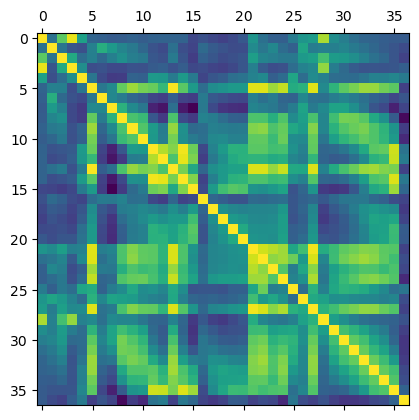

In [77]:
# create bar charts showing correlations
plt.matshow(df_FM_drop.corr('pearson', numeric_only=True))
plt.show()


Text(0.0, 1.0, 'Correlation Matrix')

<Figure size 3000x3000 with 0 Axes>

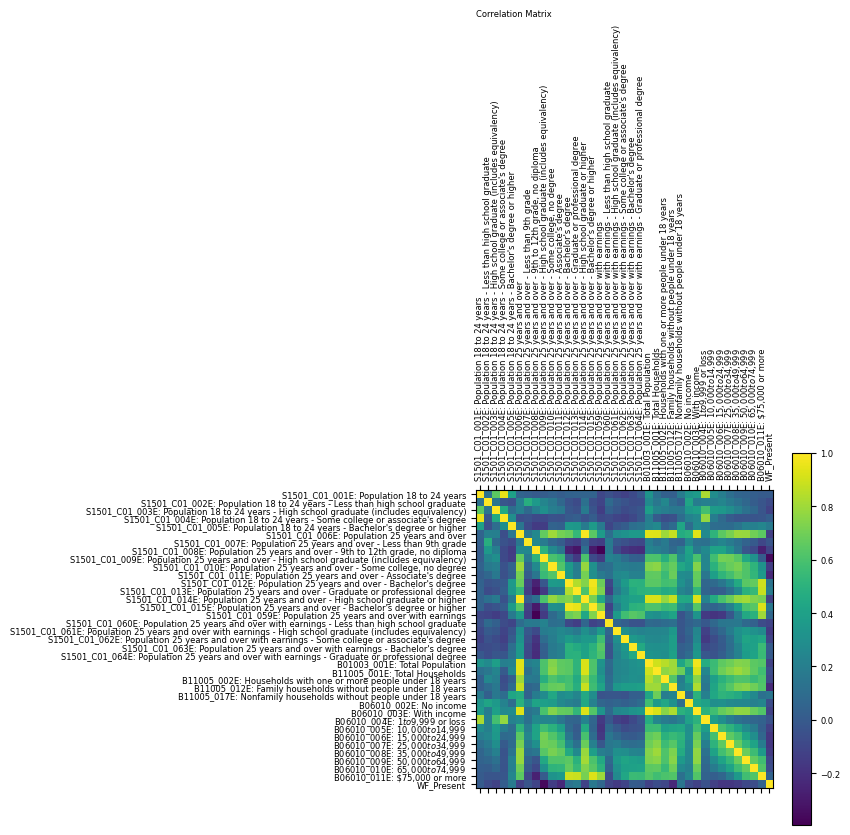

In [97]:
f = plt.figure(figsize=(30, 30))
plt.matshow(df_FM_drop.corr('pearson', numeric_only=True))
plt.xticks(range(df_FM_drop.select_dtypes(['number']).shape[1]), df_FM_drop.select_dtypes(['number']).columns, fontsize=6, rotation=90)
plt.yticks(range(df_FM_drop.select_dtypes(['number']).shape[1]), df_FM_drop.select_dtypes(['number']).columns, fontsize=6)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=6)
plt.title('Correlation Matrix', fontsize=6, loc='left')

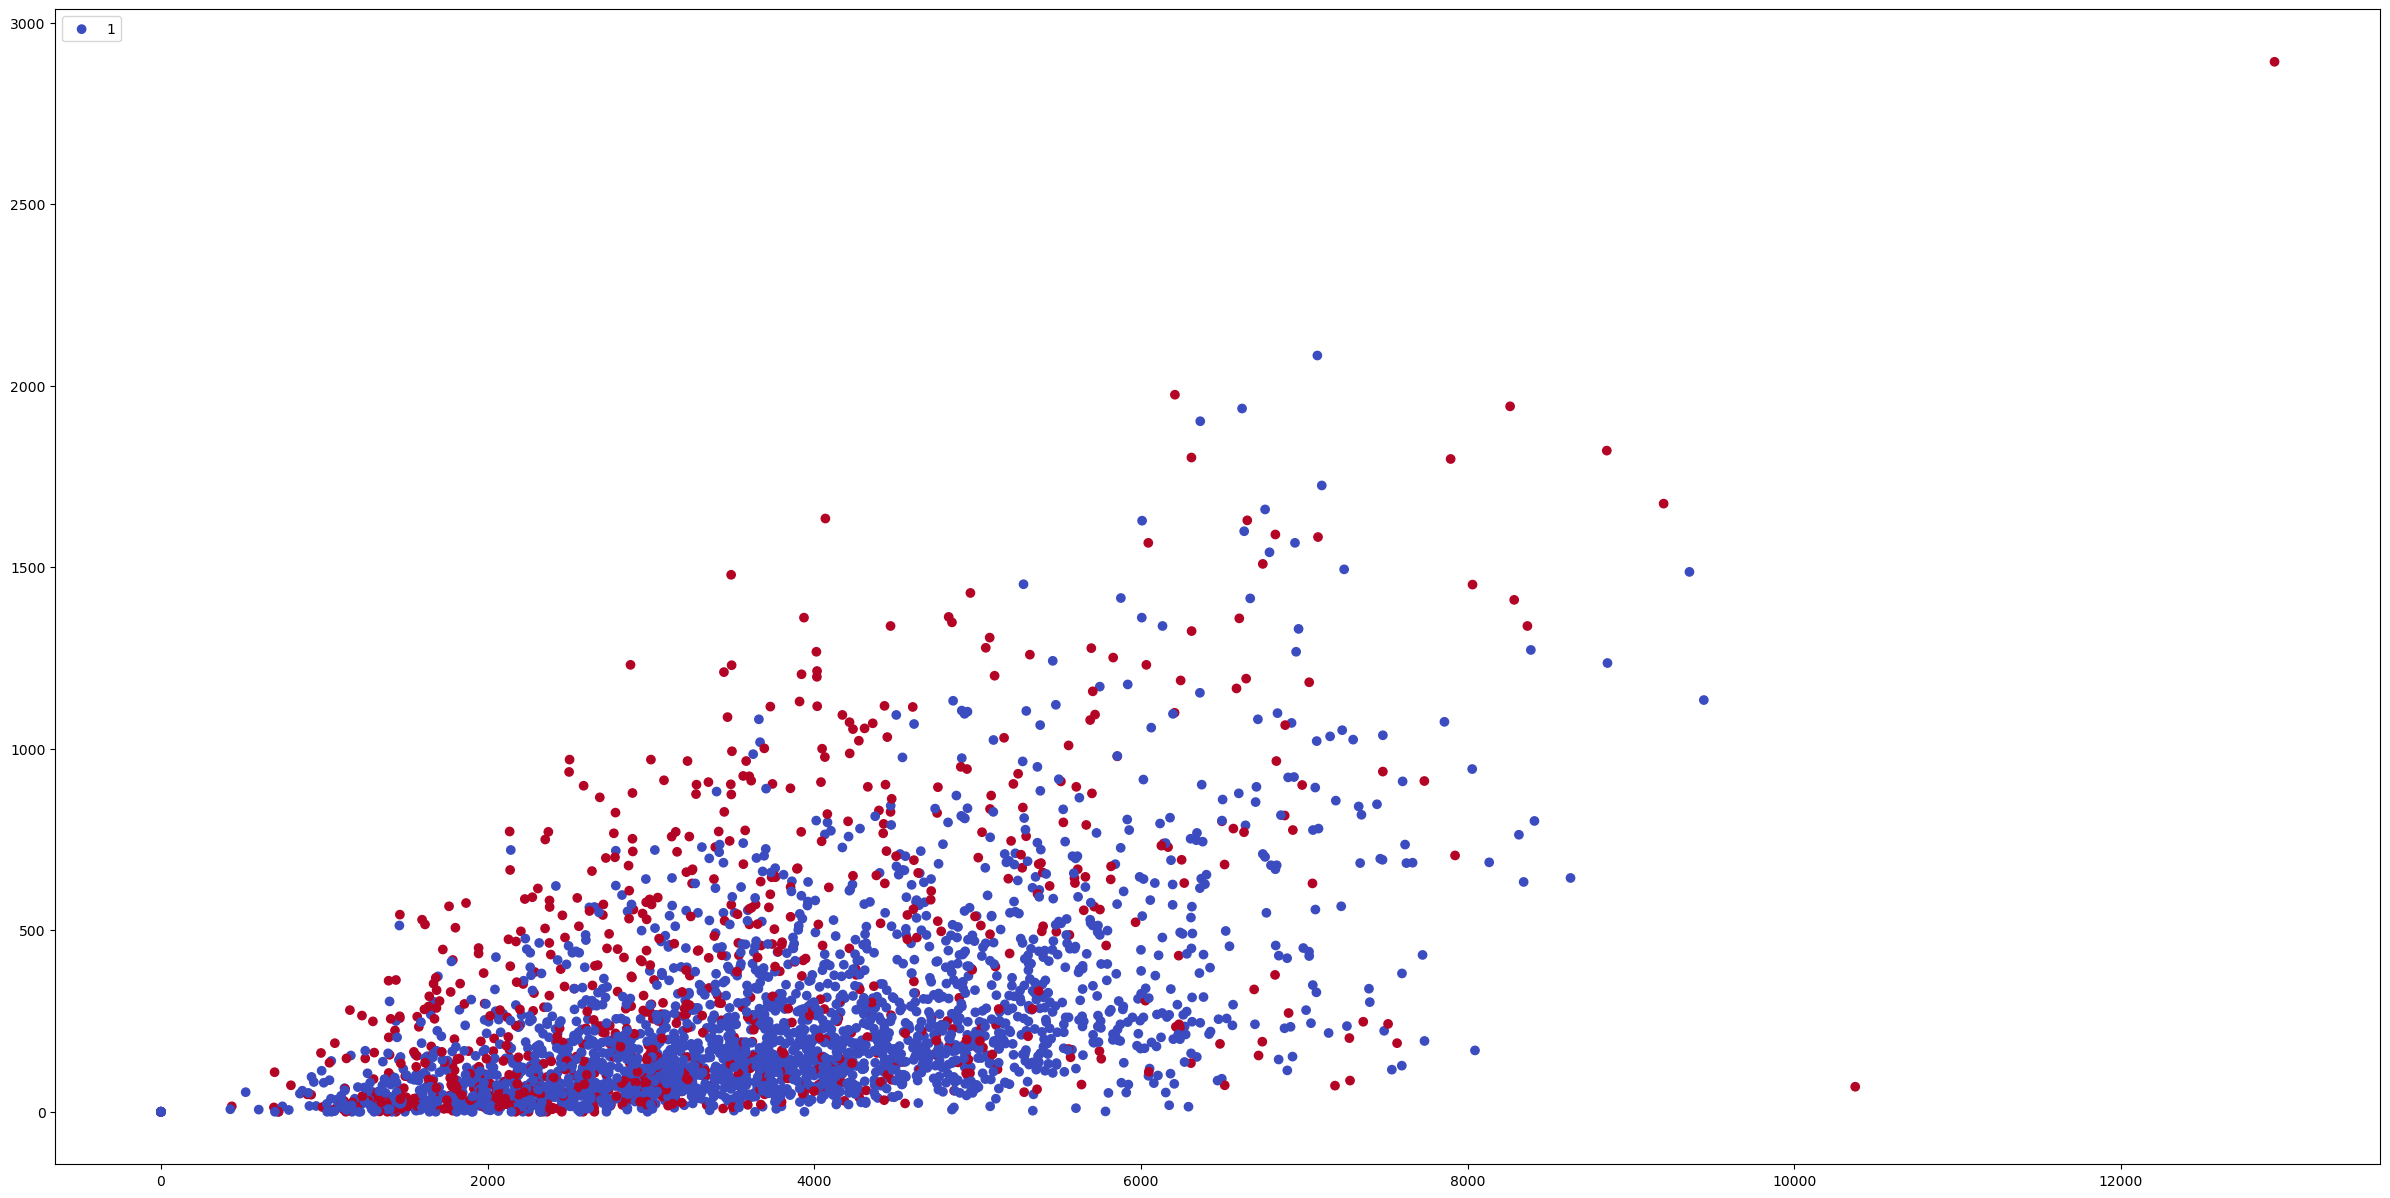

In [107]:
# scatter plot of population and bachelors degree
colors = plt.cm.coolwarm(df_full_merge['WF_Present'])
f = plt.figure(figsize=(30, 15))
plt.scatter(df_full_merge['B01003_001E: Total Population'],
            df_full_merge['S1501_C01_013E: Population 25 years and over - Graduate or professional degree'],
            c=colors, 
            marker='o', 
            label='1'
            )
plt.legend(loc='upper left')
plt.show()

In [ ]:
# scatter plot of population and bachelors degree
colors = plt.cm.coolwarm(df_full_merge['WF_Present'])
f = plt.figure(figsize=(30, 15))
plt.scatter(df_full_merge['B01003_001E: Total Population'],
            df_full_merge['S1501_C01_013E: Population 25 years and over - Graduate or professional degree'],
            c=colors, 
            marker='o', 
            label='1'
            )
plt.legend(loc='upper left')
plt.show()